{'merge_sort': [0.0003331999760121107, 0.00107849994674325, 0.014578299946151674], 'insertion_sort': [0.00029689993243664503, 0.01586059993132949, 1.286039000027813], 'timsort': [2.0900042727589607e-05, 8.060003165155649e-05, 0.0010839999886229634]}


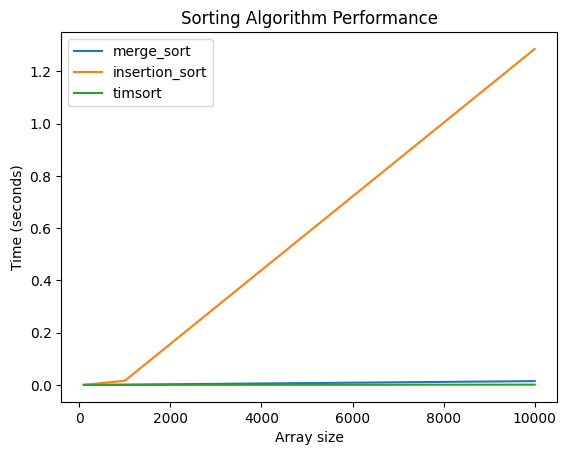

In [2]:
import random
import timeit
import matplotlib.pyplot as plt

# Merge sort
def merge_sort(arr):
    if len(arr)<=1:
        return arr
    mid=len(arr)//2
    left= merge_sort(arr[:mid])
    right= merge_sort(arr[mid:])
    return merge(left,right)

def merge(left,right):
    result=[]
    i=j=0
    while i<len(left) and j <len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i+=1
        else:
            result.append(right[j])
            j+=1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

# Insertion sort
def insertion_sort(arr):
    for i in range(1,len(arr)):
        key =arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

    return arr

# Generate random data

def generate_data(size):
    return [random.randint(0,100000) for _ in range(size)]

# Measure execution time

def measure_time(func,data):
    timer= timeit.Timer(lambda: func(data.copy()))
    return timer.timeit(number=1)

#Sizes to test

sizes = [100,1000,10000]
results = {'merge_sort': [],
           'insertion_sort': [],
           'timsort': []}

# Measure times for each size
for size in sizes:
    data=generate_data(size)

    #Measure merge sort
    merge_sort_time=measure_time(merge_sort,data)
    results['merge_sort'].append(merge_sort_time)
    
     #Measure merge sort
    insertion_sort_time=measure_time(insertion_sort,data)
    results['insertion_sort'].append(insertion_sort_time)

    # Measure Timsort (Python's sorted function)
    timsort_time = measure_time(sorted,data)
    results['timsort'].append(timsort_time)


# Print result
print(results)

#Plot results
def plot_results(results,sizes):
    for algorithm, times in results.items():
        plt.plot(sizes,times, label = algorithm)
    plt.xlabel('Array size')
    plt.ylabel('Time (seconds)')
    plt.title('Sorting Algorithm Performance')
    plt.legend()
    plt.show()

plot_results(results,sizes)
